In [1]:
import pandas as pd
import numpy as np
import cv2
import glob
import imutils
from imutils import paths
import os
import os.path
import matplotlib.pyplot as plt

In [2]:
captcha_image = 'AWS.png'
# Load the image and convert it to grayscale
image = cv2.imread(captcha_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.medianBlur(gray, ksize=9)
 
# grab the base filename as the text
filename = os.path.basename(captcha_image)
captcha_text = os.path.splitext(filename)[0]

In [3]:
# Adding some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

# applying threshold
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)[1]

(166, 616)


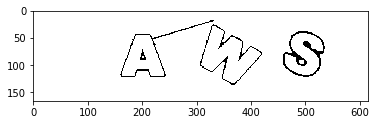

(166, 616)


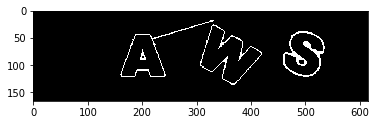

In [4]:
h,w = gray.shape[:2]
print(gray.shape)
plt.imshow(gray,cmap='gray')
plt.show()


h,w = thresh.shape[:2]
print(thresh.shape)
plt.imshow(thresh,cmap='gray')
plt.show()

In [10]:
# creating empty list for holding the coordinates of the letters
letter_image_regions = []
 
# finding the contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
print(len(contours))
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
for contour in contours:
  # Get the rectangle that contains the contour
  (x, y, w, h) = cv2.boundingRect(contour)
        
  # checking if any counter is too wide
  # if countour is too wide then there could be two letters joined together or are very close to each other
  if w / h > 1.25:
    # Split it in half into two letter regions
    half_width = int(w / 2)
    letter_image_regions.append((x, y, half_width, h))
    letter_image_regions.append((x + half_width, y, half_width, h))
  else:  
    letter_image_regions.append((x, y, w, h))

3


(109, 90)


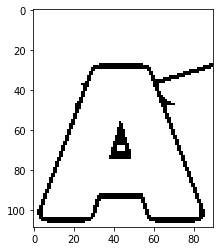

(109, 90)


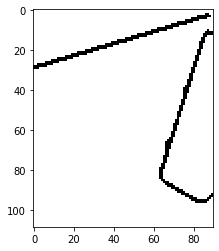

(115, 119)


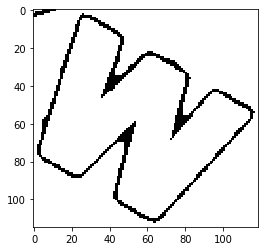

In [6]:
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Save each letter as a single image
for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_text):
  # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box

  # Extract the letter from the original image with a 2-pixel margin around the edge
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]
    h,w = letter_image.shape[:2]
    print(letter_image.shape)
    plt.imshow(letter_image,cmap='gray')
    plt.show()